In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# test data contains only colorado and utah
climb = pd.read_csv('climb.csv', index_col=0)

In [20]:
a = ['105708959', '105733851', '111499894', '105734016', '108012805']
a[0]

'105708959'

In [26]:

map(lambda a: a, climb['area_hierarchy'][:10])

#np.where(climb[''])
#map(len, climb['children_href'])

['[', '[', '[', '[', '[', '[', '[', '[', '[', '[']

In [6]:
user_language_array = climb['description'].dropna().tolist()

In [73]:
tfidf = TfidfVectorizer(
    min_df=0.01, max_df=0.1,
    stop_words = 'english',
    strip_accents = 'unicode', lowercase=True, ngram_range=(1,2),
    norm='l2', smooth_idf=True, sublinear_tf=True, use_idf=True
)

In [74]:
X = tfidf.fit_transform(user_language_array)

In [75]:
feature_names = tfidf.get_feature_names()

In [76]:
print "There are %d words in the vocabulary" % len(feature_names)

There are 530 words in the vocabulary


In [77]:
def get_keyword(tfidf_matrix):
    dense = tfidf_matrix.todense()
    description_keyword = []
    for i in range(dense.shape[0]):
        episode = dense[i].tolist()[0]
        phrase_scores = [pair for pair in zip(range(0, len(episode)), episode) if pair[1] > 0]
        sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
        
        keyword = []
        for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores]:
            keyword.append(phrase)
        keyword_summary = " ".join(keyword)
        description_keyword.append(keyword_summary)
        
    return pd.Series(description_keyword)

In [80]:
c = get_keyword(X)

In [81]:
c[:20]

[u'lower high section',
 u'ascent peak time day unique called valley real amazing mountain book climber descent ledges 12 excellent upper summit gear best high end',
 u'exposed summit narrow leading block peak end scramble ridge lies cross steep face 5th climbers bring exit point class huge getting final far main pretty couple difficult east classic low south base chimney continue',
 u'park granite quality',
 u'nice access granite canyon make pull like climbs',
 u'crimpy loose rock pulls loose nice little',
 u'avoid pillar grade',
 u'mountain located makes traversing provides doesn road higher summer lots trail fall place quite main near classic 10 nice long area',
 u'rocks problems trail head slopey bouldering trad leading boulders offers super directly loose going scramble solid climbs follow area',
 u'summer offers trail place moderate pull climbs',
 u'definitely tall fairly want harder pretty problem big',
 u'super warm solid problem',
 u'slopers super solid',
 u'slopey sloping use

In [126]:
# VOTE = 5
# indices = np.where(climb['starvotes'] >= VOTE)[0]
# X = X[indices,:]
# print climb[indicies,:]

In [30]:
#D = -(X * X.T).todense() # Distance matrix: dot product between tfidf vectors
D = -(X.T * X).todense() # DO IT FOR THE WORDS

In [31]:
D.shape

(530, 530)

In [39]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
pos = model.fit_transform(D)

In [40]:
# from sklearn.manifold import MDS
# mds = MDS(n_components=2, metric=True, max_iter=100, eps=1e-7,
#                     dissimilarity='precomputed', random_state=42, n_init=1)
# pos = mds.fit_transform(D)

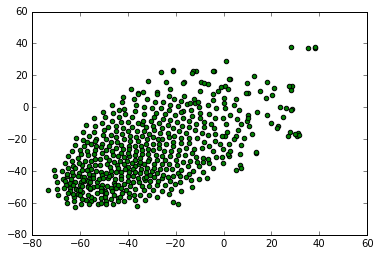

In [41]:
plt.scatter(pos[:, 0], pos[:, 1], s=20, c='g')